In [277]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingRegressor,StackingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import pickle

In [164]:
df=pd.read_csv('Flipart_Mobiles-10-20k.csv')
df.head()

,Unnamed: 0,link,name,price,rating,rating&review_c,description
0,0,https://www.flipkart.com/realme-9i-prism-black...,"realme 9i (Prism Black, 64 GB)","₹10,499",4.5,"1,10,702 Ratings & 6,523 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....
1,1,https://www.flipkart.com/realme-9i-prism-blue-...,"realme 9i (Prism Blue, 64 GB)","₹10,499",4.5,"1,10,702 Ratings & 6,523 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....
2,2,https://www.flipkart.com/realme-9i-prism-blue-...,"realme 9i (Prism Blue, 128 GB)","₹11,499",4.5,"1,10,702 Ratings & 6,523 Reviews",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...
3,3,https://www.flipkart.com/realme-9i-prism-black...,"realme 9i (Prism Black, 128 GB)","₹13,499",4.5,"25,154 Ratings & 1,503 Reviews",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...
4,4,https://www.flipkart.com/realme-9i-prism-black...,"realme 9i (Prism Black, 128 GB)","₹11,499",4.5,"1,10,702 Ratings & 6,523 Reviews",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...


In [165]:
df.shape

(2088, 7)

In [166]:
df.isnull().values.any()

False

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2088 non-null   int64  
 1   link             2088 non-null   object 
 2   name             2088 non-null   object 
 3   price            2088 non-null   object 
 4   rating           2088 non-null   float64
 5   rating&review_c  2088 non-null   object 
 6   description      2088 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 114.3+ KB


In [168]:
df.duplicated().sum()

0

In [169]:
df.drop(columns=['Unnamed: 0','link'],axis=1,inplace=True)
df.head()

,name,price,rating,rating&review_c,description
0,"realme 9i (Prism Black, 64 GB)","₹10,499",4.5,"1,10,702 Ratings & 6,523 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....
1,"realme 9i (Prism Blue, 64 GB)","₹10,499",4.5,"1,10,702 Ratings & 6,523 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....
2,"realme 9i (Prism Blue, 128 GB)","₹11,499",4.5,"1,10,702 Ratings & 6,523 Reviews",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...
3,"realme 9i (Prism Black, 128 GB)","₹13,499",4.5,"25,154 Ratings & 1,503 Reviews",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...
4,"realme 9i (Prism Black, 128 GB)","₹11,499",4.5,"1,10,702 Ratings & 6,523 Reviews",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...


In [170]:
df['name'].value_counts()

realme 9i (Prism Blue, 128 GB)                88
realme 9i (Prism Black, 128 GB)               88
realme 9 (Meteor Black, 128 GB)               88
realme 9 (Sunburst Gold, 128 GB)              88
vivo T1 44W (Midnight Galaxy, 128 GB)         87
vivo T1 44W (Starry Sky, 128 GB)              87
POCO M4 Pro 5G (Cool Blue, 128 GB)            87
realme 10 Pro 5G (Dark Matter, 128 GB)        86
vivo T1 5G (Rainbow Fantasy, 128 GB)          68
realme 10 Pro 5G (Hyperspace, 128 GB)         61
realme 9i (Prism Blue, 64 GB)                 44
SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)    44
POCO M4 Pro (Cool Blue, 128 GB)               44
POCO M4 Pro 5G (Power Black, 64 GB)           44
realme 9i (Prism Black, 64 GB)                44
MOTOROLA G60 (Moonless, 128 GB)               44
POCO M4 Pro (Power Black, 128 GB)             44
POCO M4 Pro (Cool Blue, 64 GB)                44
POCO M4 5G (Cool Blue, 128 GB)                44
POCO M4 5G (Power Black, 128 GB)              44
realme 9 (Stargaze W

In [171]:
df['name'][0]

'realme 9i (Prism Black, 64 GB)'

In [172]:
def model_stractor(text):
    return text.split('(')[0].strip()

In [173]:
df['model']=df['name'].apply(model_stractor)

In [174]:
df.sample(5)

,name,price,rating,rating&review_c,description,model
165,"POCO M4 Pro 5G (Power Black, 64 GB)","₹11,999",4.3,"31,511 Ratings & 2,817 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,POCO M4 Pro 5G
549,"POCO M4 Pro 5G (Power Black, 64 GB)","₹11,999",4.3,"31,511 Ratings & 2,817 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,POCO M4 Pro 5G
1791,"POCO M4 5G (Cool Blue, 128 GB)","₹12,999",4.1,"21,399 Ratings & 1,757 Reviews",6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,POCO M4 5G
169,"realme 10 Pro 5G (Dark Matter, 128 GB)","₹19,999",4.4,614 Ratings & 87 Reviews,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,realme 10 Pro 5G
275,"realme 10 Pro 5G (Hyperspace, 128 GB)","₹18,999",4.4,"1,246 Ratings & 128 Reviews",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,realme 10 Pro 5G


In [175]:
df['model'].value_counts()

realme 9i             264
POCO M4 Pro 5G        260
POCO M4 Pro           243
realme 9              220
realme 10 Pro 5G      190
vivo T1 44W           174
vivo T1X              172
POCO M4 5G            131
MOTOROLA g52           88
vivo T1 5G             68
SAMSUNG Galaxy F13     44
MOTOROLA G60           44
SAMSUNG GALAXY M13     43
OPPO K10               43
MOTOROLA G62 5G        43
POCO X4 Pro 5G         43
REDMI Note 10T 5G      18
Name: model, dtype: int64

In [176]:
df['price']=df['price'].str.replace('₹','')
df['price']=df['price'].str.replace(',','.')
df['price']=df['price'].astype('float')

In [177]:
df.head()

,name,price,rating,rating&review_c,description,model
0,"realme 9i (Prism Black, 64 GB)",10.499,4.5,"1,10,702 Ratings & 6,523 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,realme 9i
1,"realme 9i (Prism Blue, 64 GB)",10.499,4.5,"1,10,702 Ratings & 6,523 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,realme 9i
2,"realme 9i (Prism Blue, 128 GB)",11.499,4.5,"1,10,702 Ratings & 6,523 Reviews",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,realme 9i
3,"realme 9i (Prism Black, 128 GB)",13.499,4.5,"25,154 Ratings & 1,503 Reviews",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,realme 9i
4,"realme 9i (Prism Black, 128 GB)",11.499,4.5,"1,10,702 Ratings & 6,523 Reviews",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,realme 9i


C:\Users\power\AppData\Local\Temp\ipykernel_12764\4263080889.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],color='green')


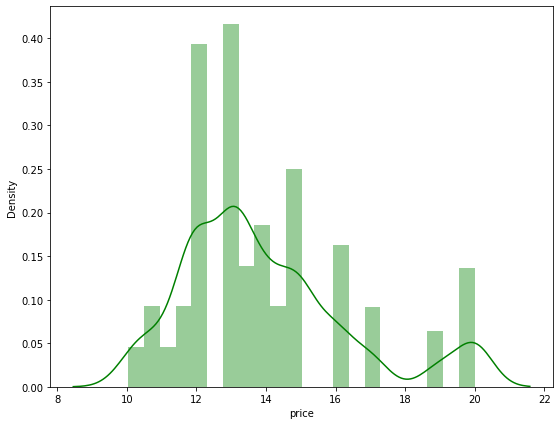

In [178]:
plt.figure(figsize=(9,7))
sns.distplot(df['price'],color='green')
plt.show()

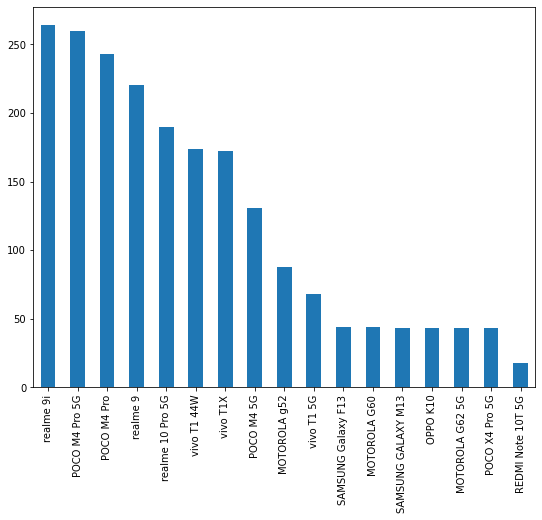

In [179]:
plt.figure(figsize=(9,7))
df['model'].value_counts().plot(kind='bar')
plt.show()

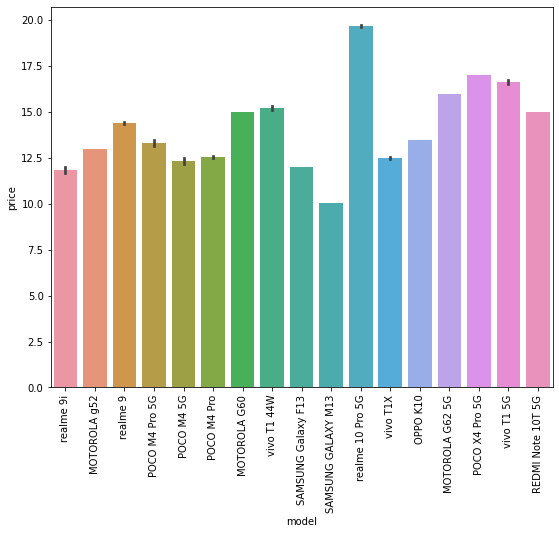

In [180]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='model',y='price')
plt.show()

In [181]:
def color_extractor(text):
    return text.split('(')[1].split(',')[0].strip()

In [182]:
df['color']=df['name'].apply(color_extractor)

In [183]:
df.sample(5)

,name,price,rating,rating&review_c,description,model,color
1713,"REDMI Note 10T 5G (Mint Green, 128 GB)",14.999,4.2,"30,384 Ratings & 2,358 Reviews",6 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Full...,REDMI Note 10T 5G,Mint Green
1464,"SAMSUNG GALAXY M13 (Midnight Blue, 64 GB)",10.044,4.3,"1,596 Ratings & 110 Reviews",4 GB RAM | 64 GB ROM16.76 cm (6.6 inch) Displa...,SAMSUNG GALAXY M13,Midnight Blue
526,"vivo T1X (Gravity Black, 128 GB)",12.999,4.5,"64,576 Ratings & 3,659 Reviews",4 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...,vivo T1X,Gravity Black
219,"vivo T1 44W (Midnight Galaxy, 128 GB)",15.999,4.4,"41,702 Ratings & 3,255 Reviews",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,vivo T1 44W,Midnight Galaxy
1270,"POCO M4 Pro (Cool Blue, 128 GB)",12.999,4.3,"1,24,246 Ratings & 11,419 Reviews",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,POCO M4 Pro,Cool Blue


In [184]:
df['color'].value_counts()

Cool Blue          262
Power Black        261
Prism Black        132
Prism Blue         132
Yellow             111
Meteor Black        88
Sunburst Gold       88
Midnight Galaxy     87
Starry Sky          87
Dark Matter         86
Gravity Black       86
Space Blue          86
Rainbow Fantasy     68
Hyperspace          61
Nightsky Green      44
Moonless            44
Stargaze White      44
Metallic White      44
Charcoal Grey       44
Midnight Blue       43
Blue Flame          43
Nebula Blue         43
Midnight Gray       43
Laser Black         43
Mint Green          18
Name: color, dtype: int64

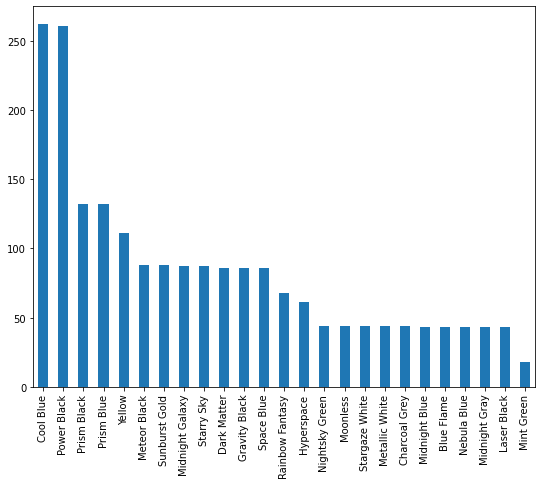

In [185]:
plt.figure(figsize=(9,7))
df['color'].value_counts().plot(kind='bar')
plt.show()

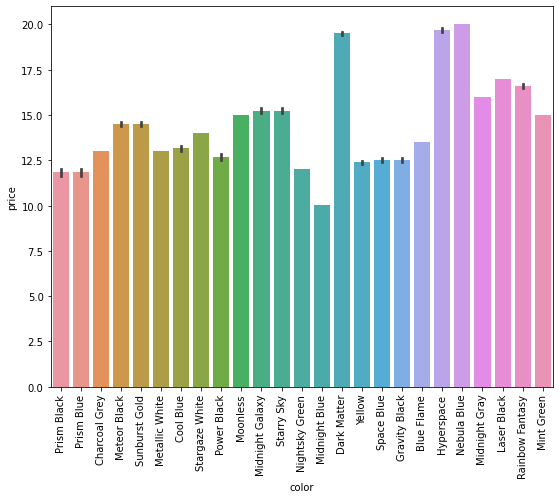

In [186]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='color',y='price')
plt.show()

In [187]:
df.drop(columns=['name','rating','rating&review_c'],axis='columns',inplace=True)
df.head()

,price,description,model,color
0,10.499,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,realme 9i,Prism Black
1,10.499,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,realme 9i,Prism Blue
2,11.499,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,realme 9i,Prism Blue
3,13.499,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,realme 9i,Prism Black
4,11.499,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,realme 9i,Prism Black


In [188]:
def company_extractor(text):
    if 'realme' in text:
        return 'Realme'
    elif 'MOTOROLA' in text:
        return 'Lenovo'
    elif 'POCO' in text:
        return 'Xiaomi'
    elif 'vivo' in text:
        return 'BBK Electronics'
    elif 'SAMSUNG' in text:
        return 'Samsung'
    elif 'OPPO' in text:
        return 'BBK Electronics'
    else:
        return 'Xiaomi'

In [189]:
df['company']=df['model'].apply(company_extractor)

In [190]:
df.sample(5)

,price,description,model,color,company
829,13.999,6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...,realme 9,Stargaze White,Realme
20,14.499,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,vivo T1 44W,Starry Sky,BBK Electronics
165,11.999,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,POCO M4 Pro 5G,Power Black,Xiaomi
679,13.999,6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...,realme 9,Sunburst Gold,Realme
329,11.999,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,POCO M4 Pro 5G,Yellow,Xiaomi


In [191]:
df['company'].value_counts()

Xiaomi             695
Realme             674
BBK Electronics    457
Lenovo             175
Samsung             87
Name: company, dtype: int64

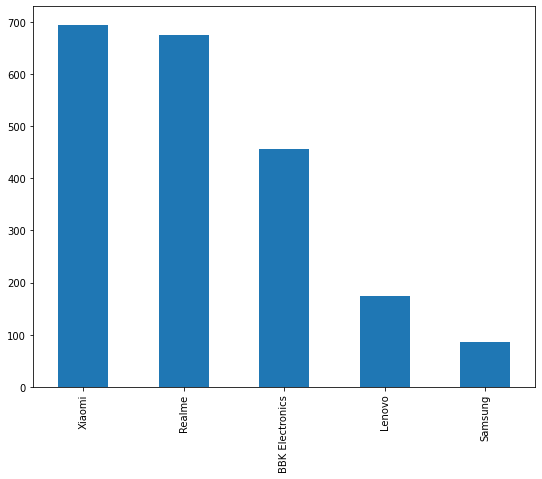

In [192]:
plt.figure(figsize=(9,7))
df['company'].value_counts().plot(kind='bar')
plt.show()

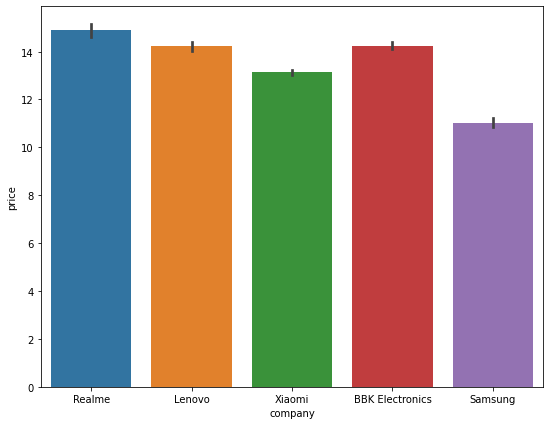

In [193]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='company',y='price')
plt.show()

In [194]:
df['description'][0]

'4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16.76 cm (6.6 inch) Full HD+ Display50MP + 2MP + 2MP | 16MP Front Camera5000 mAh Lithium ion BatteryQualcomm Snapdragon 680 (SM6225) Processor1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories'

In [195]:
df['description'][0].split()[0].strip()

'4'

In [196]:
def RAM_stractor(text):
    return text.split()[0].strip()

In [197]:
df['RAM']=df['description'].apply(RAM_stractor)

In [198]:
df.sample(5)

,price,description,model,color,company,RAM
346,13.999,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,POCO M4 Pro 5G,Cool Blue,Xiaomi,6
1156,11.499,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,realme 9i,Prism Black,Realme,4
1145,11.999,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,POCO M4 Pro 5G,Yellow,Xiaomi,4
988,11.999,6 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,POCO M4 Pro,Power Black,Xiaomi,6
533,13.499,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,realme 9i,Prism Blue,Realme,6


In [199]:
df['RAM'].dtypes

dtype('O')

In [200]:
df['RAM']=df['RAM'].astype('int')

In [201]:
df['RAM'].dtypes

dtype('int32')

In [202]:
df['RAM'].value_counts()

6    1064
4     721
8     303
Name: RAM, dtype: int64

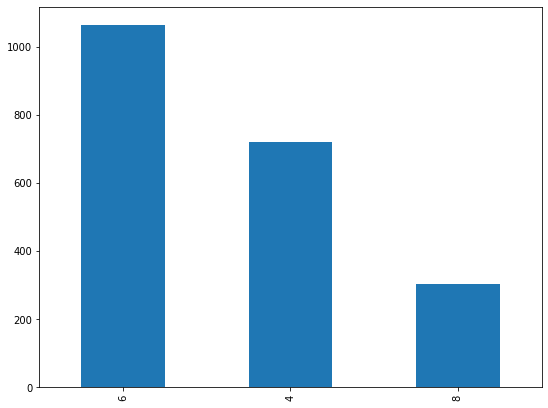

In [203]:
plt.figure(figsize=(9,7))
df['RAM'].value_counts().plot(kind='bar')
plt.show()

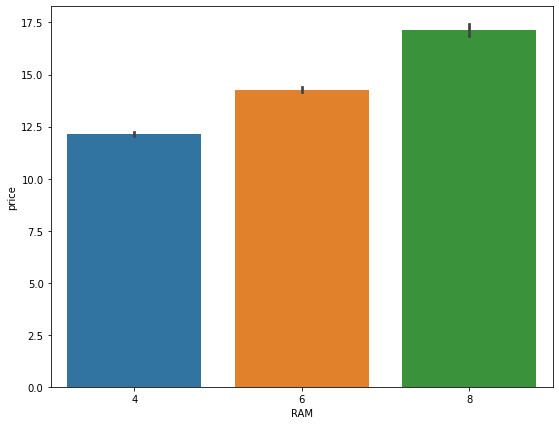

In [204]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='RAM',y='price')
plt.show()

C:\Users\power\AppData\Local\Temp\ipykernel_12764\2869720011.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['RAM'],color='green')


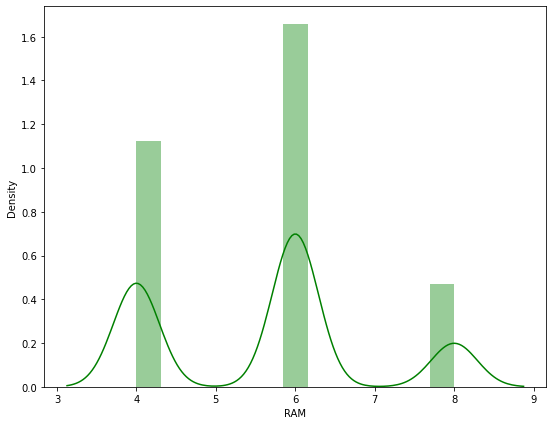

In [205]:
plt.figure(figsize=(9,7))
sns.distplot(df['RAM'],color='green')
plt.show()

In [206]:
df['description'][0].split('|')[1].replace('GB ROM','').strip()

'64'

In [207]:
def ROM_extractor(text):
        return text.split('|')[1].replace('GB ROM','').strip()

In [208]:
df['ROM']=df['description'].apply(ROM_extractor)

In [209]:
df.sample(5)

,price,description,model,color,company,RAM,ROM
1131,15.999,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,vivo T1 44W,Midnight Galaxy,BBK Electronics,6,128
92,12.999,4 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...,vivo T1X,Gravity Black,BBK Electronics,4,128 16.71 cm (6.58 inch) Full HD+ Display50MP ...
1179,15.999,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,vivo T1 44W,Midnight Galaxy,BBK Electronics,6,128
1398,12.999,6 GB RAM | 128 GB ROM16.76 cm (6.6 inch) Full ...,MOTOROLA g52,Charcoal Grey,Lenovo,6,128 16.76 cm (6.6 inch) Full HD+ Display50MP +...
1687,13.999,6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...,realme 9,Meteor Black,Realme,6,128


In [210]:
df['ROM'].value_counts()

128                                                                                                 1263
64                                                                                                   417
128 16.76 cm (6.6 inch) Full HD+ Display50MP + 8MP + 2MP                                              88
64 16.71 cm (6.58 inch) Full HD+ Display50MP + 2MP                                                    86
128 16.71 cm (6.58 inch) Full HD+ Display50MP + 2MP                                                   86
128 17.22 cm (6.78 inch) Full HD+ Display108MP + 8MP + 2MP                                            44
64 16.76 cm (6.6 inch) Display50MP Rear Camera6000 mAh Battery12 MONTHS                               43
128 16.64 cm (6.55 inch) Full HD+ Display50MP + 8MP + 2MP                                             43
128 16.66 cm (6.56 inch) Full HD+ Display48MP Primary Camera + 2MP Macro Lens + 2MP Depth Sensor      18
Name: ROM, dtype: int64

In [211]:
def ROM_extractor2(text):
    if len(text)>3:
        return text.split()[0].strip()
    else:
        return text

In [212]:
df['ROM']=df['ROM'].apply(ROM_extractor2)

In [213]:
df['ROM'].value_counts()

128    1542
64      546
Name: ROM, dtype: int64

In [214]:
df['ROM']=df['ROM'].astype('int')
df['ROM'].dtypes

dtype('int32')

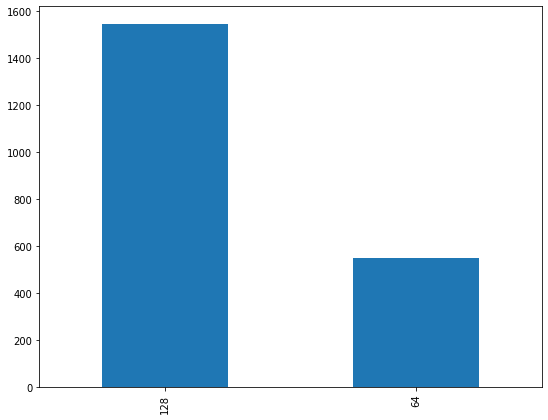

In [215]:
plt.figure(figsize=(9,7))
df['ROM'].value_counts().plot(kind='bar')
plt.show()

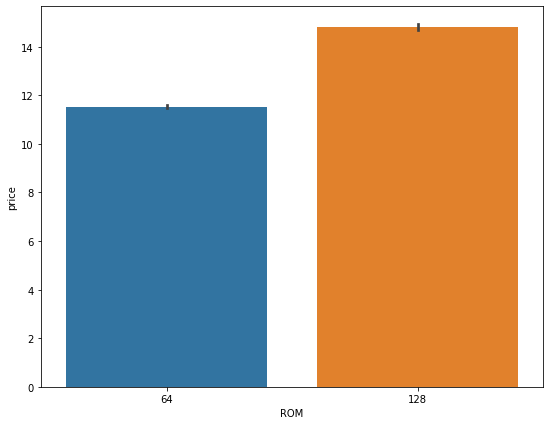

In [216]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='ROM',y='price')
plt.show()

In [217]:
df['description'][0]

'4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16.76 cm (6.6 inch) Full HD+ Display50MP + 2MP + 2MP | 16MP Front Camera5000 mAh Lithium ion BatteryQualcomm Snapdragon 680 (SM6225) Processor1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories'

In [218]:
df['description'][0].split('Display')[1].split('+')[0].replace('MP','').strip()

'50'

In [219]:
def first_camera_extractor(text):
    return text.split('Display')[1].split('+')[0].replace('MP','').strip()

In [220]:
df['first camera']=df['description'].apply(first_camera_extractor)

In [221]:
df.sample(5)

,price,description,model,color,company,RAM,ROM,first camera
1617,11.999,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,POCO M4 Pro 5G,Cool Blue,Xiaomi,4,64,50
1641,12.999,6 GB RAM | 128 GB ROM16.76 cm (6.6 inch) Full ...,MOTOROLA g52,Metallic White,Lenovo,6,128,50
2068,11.499,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,realme 9i,Prism Black,Realme,4,128,50
337,10.499,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,realme 9i,Prism Blue,Realme,4,64,50
279,10.999,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,POCO M4 5G,Power Black,Xiaomi,4,64,50


In [222]:
df['first camera'].dtypes

dtype('O')

In [223]:
df['first camera'].value_counts()

50                                         1287
108                                         454
64                                          286
50 Rear Camera6000 mAh Battery12 MONTHS      43
48 Primary Camera                            18
Name: first camera, dtype: int64

In [224]:
def first_camera_extractor2(text):
    if len(text)>3:
        return text.split()[0].strip()
    else:
        return text

In [225]:
df['first camera']=df['first camera'].apply(first_camera_extractor2)

In [226]:
df['first camera']=df['first camera'].astype('int')

In [227]:
df['first camera'].value_counts()

50     1330
108     454
64      286
48       18
Name: first camera, dtype: int64

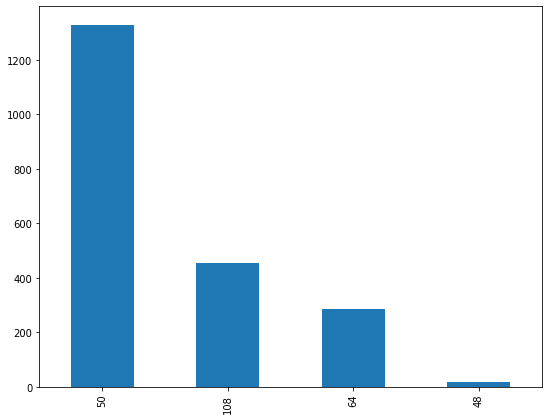

In [228]:
plt.figure(figsize=(9,7))
df['first camera'].value_counts().plot(kind='bar')
plt.show()

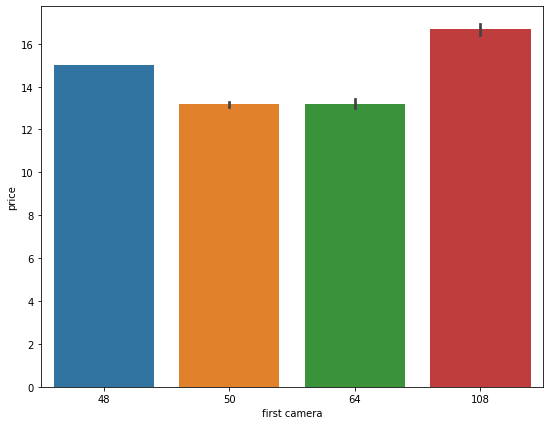

In [229]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='first camera',y='price')
plt.show()

In [230]:
df['description'][0]

'4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16.76 cm (6.6 inch) Full HD+ Display50MP + 2MP + 2MP | 16MP Front Camera5000 mAh Lithium ion BatteryQualcomm Snapdragon 680 (SM6225) Processor1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories'

In [231]:
df['description'][0].split('Front')[0].split('|')[-1].replace('MP','').strip()

'16'

In [232]:
def front_camera_extractor(text):
    return text.split('Front')[0].split('|')[-1].replace('MP','').strip()

In [233]:
df['front camera']=df['description'].apply(front_camera_extractor)

In [234]:
df['front camera'].value_counts()

16                                                                             1636
8                                                                               365
32                                                                               44
64 GB ROM16.76 cm (6.6 inch) Display50 Rear Camera6000 mAh Battery12 MONTHS      43
Name: front camera, dtype: int64

In [235]:
df['description'].value_counts()

6 GB RAM | 128 GB ROM | Expandable Upto 256 GB16.26 cm (6.4 inch) Full HD+ AMOLED Display108MP + 8MP + 2MP | 16MP Front Camera5000 mAh Lithium Ion BatteryQualcomm Snapdragon 680 Processor1 Year Manufacturer Warranty for Phone and 6 Months Warranty for In-Box Accessories                                                                                                                                                                    132
6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16.33 cm (6.43 inch) Full HD+ AMOLED Display64MP + 8MP + 2MP | 16MP Front Camera5000 mAh Lithium-ion Polymer BatteryMediatek Helio G96 ProcessorOne Year for Handset, 6 Months for Accessories                                                                                                                                                                                                        131
4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16.76 cm (6.6 inch) Full HD+ Display50MP + 8MP | 16MP Front Camera5000 mAh Lithiu

In [236]:
df=df[df['front camera']!='64 GB ROM16.76 cm (6.6 inch) Display50 Rear Camera6000 mAh Battery12 MONTHS']

In [237]:
df.shape

(2045, 9)

In [238]:
df['front camera'].value_counts()

16    1636
8      365
32      44
Name: front camera, dtype: int64

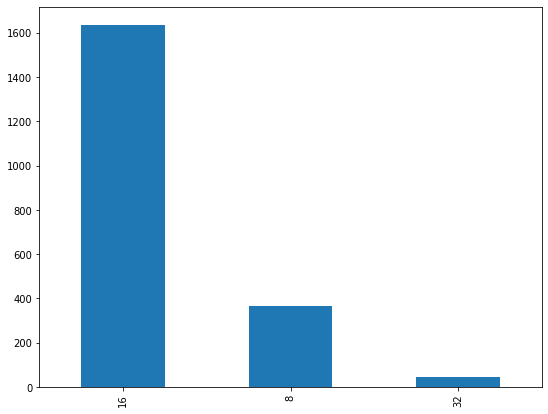

In [239]:
plt.figure(figsize=(9,7))
df['front camera'].value_counts().plot(kind='bar')
plt.show()

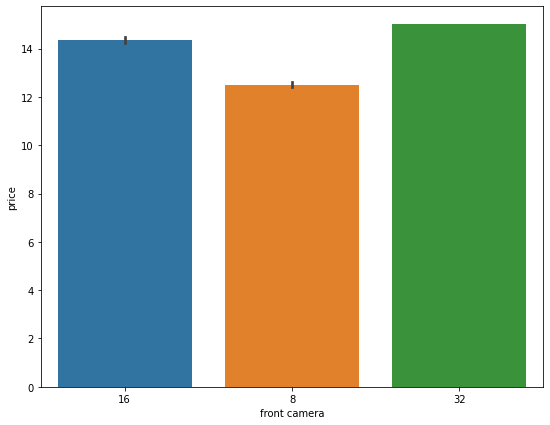

In [240]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='front camera',y='price')
plt.show()

In [241]:
df.sample(5)

,price,description,model,color,company,RAM,ROM,first camera,front camera
553,19.999,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,realme 10 Pro 5G,Dark Matter,Realme,8,128,108,16
1062,12.999,6 GB RAM | 128 GB ROM16.76 cm (6.6 inch) Full ...,MOTOROLA g52,Charcoal Grey,Lenovo,6,128,50,16
1929,12.999,6 GB RAM | 128 GB ROM16.76 cm (6.6 inch) Full ...,MOTOROLA g52,Metallic White,Lenovo,6,128,50,16
870,12.999,6 GB RAM | 128 GB ROM16.76 cm (6.6 inch) Full ...,MOTOROLA g52,Charcoal Grey,Lenovo,6,128,50,16
921,12.999,6 GB RAM | 128 GB ROM16.76 cm (6.6 inch) Full ...,MOTOROLA g52,Metallic White,Lenovo,6,128,50,16


In [242]:
df['description'][0]

'4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16.76 cm (6.6 inch) Full HD+ Display50MP + 2MP + 2MP | 16MP Front Camera5000 mAh Lithium ion BatteryQualcomm Snapdragon 680 (SM6225) Processor1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories'

In [243]:
df['description'][0].split('mAh')[0].split()[-1].replace('Camera','').strip()

'5000'

In [244]:
def battery_extractor(text):
    return text.split('mAh')[0].split()[-1].replace('Camera','').strip()

In [245]:
df['Battery (mAh)']=df['description'].apply(battery_extractor)

In [246]:
df['Battery (mAh)'].value_counts()

5000    1957
6000      88
Name: Battery (mAh), dtype: int64

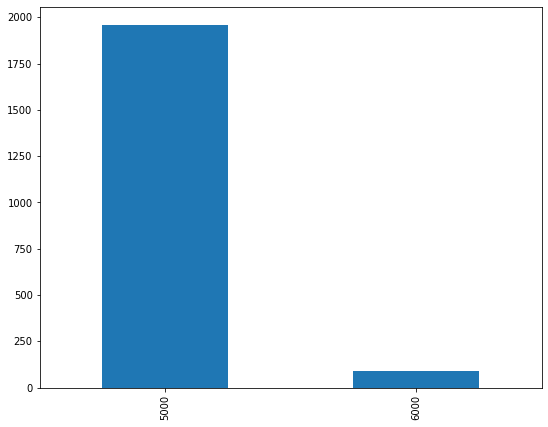

In [247]:
plt.figure(figsize=(9,7))
df['Battery (mAh)'].value_counts().plot(kind='bar')
plt.show()

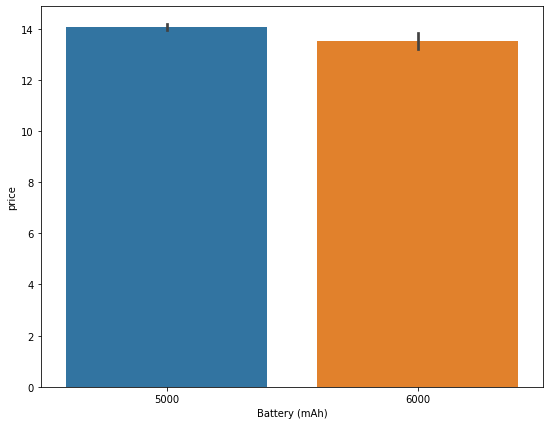

In [248]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='Battery (mAh)',y='price')
plt.show()

In [249]:
df['description'].value_counts()

6 GB RAM | 128 GB ROM | Expandable Upto 256 GB16.26 cm (6.4 inch) Full HD+ AMOLED Display108MP + 8MP + 2MP | 16MP Front Camera5000 mAh Lithium Ion BatteryQualcomm Snapdragon 680 Processor1 Year Manufacturer Warranty for Phone and 6 Months Warranty for In-Box Accessories                                                                                                                                                                    132
6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16.33 cm (6.43 inch) Full HD+ AMOLED Display64MP + 8MP + 2MP | 16MP Front Camera5000 mAh Lithium-ion Polymer BatteryMediatek Helio G96 ProcessorOne Year for Handset, 6 Months for Accessories                                                                                                                                                                                                        131
4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16.76 cm (6.6 inch) Full HD+ Display50MP + 8MP | 16MP Front Camera5000 mAh Lithiu

In [250]:
def processor_extractor(text):
    if 'Snapdragon' in text:
        return 'Snapdragon'
    else:
        return 'Mediatek'

In [251]:
df['Processor']=df['description'].apply(processor_extractor)

In [252]:
df.sample(5)

,price,description,model,color,company,RAM,ROM,first camera,front camera,Battery (mAh),Processor
645,14.499,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,vivo T1 44W,Starry Sky,BBK Electronics,4,128,50,16,5000,Snapdragon
2028,14.999,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...,realme 9,Sunburst Gold,Realme,8,128,108,16,5000,Snapdragon
1483,12.999,4 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...,vivo T1X,Space Blue,BBK Electronics,4,128,50,8,5000,Snapdragon
87,15.999,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,vivo T1 44W,Starry Sky,BBK Electronics,6,128,50,16,5000,Snapdragon
113,12.999,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,POCO M4 Pro,Power Black,Xiaomi,6,128,64,16,5000,Mediatek


In [253]:
df['Processor'].value_counts()

Snapdragon    1349
Mediatek       696
Name: Processor, dtype: int64

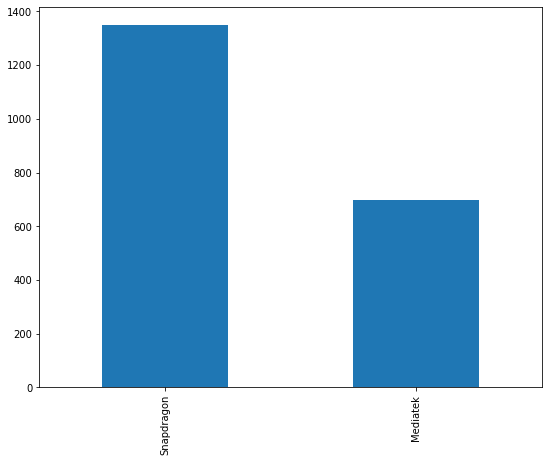

In [254]:
plt.figure(figsize=(9,7))
df['Processor'].value_counts().plot(kind='bar')
plt.show()

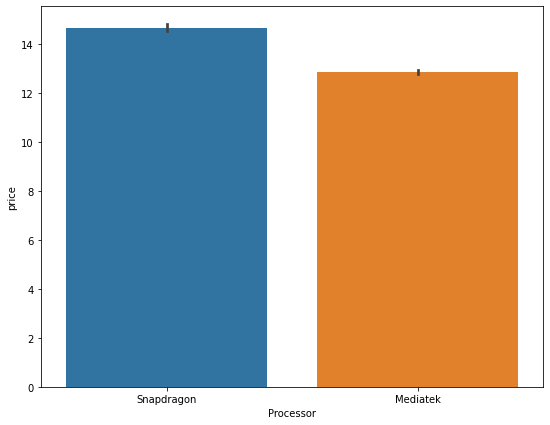

In [255]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='Processor',y='price')
plt.show()

In [256]:
df.sample(5)

,price,description,model,color,company,RAM,ROM,first camera,front camera,Battery (mAh),Processor
1928,13.999,6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...,realme 9,Meteor Black,Realme,6,128,108,16,5000,Snapdragon
868,11.499,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,realme 9i,Prism Black,Realme,4,128,50,16,5000,Snapdragon
1530,14.999,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,POCO M4 Pro 5G,Power Black,Xiaomi,8,128,50,16,5000,Mediatek
827,14.999,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...,realme 9,Sunburst Gold,Realme,8,128,108,16,5000,Snapdragon
1791,12.999,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,POCO M4 5G,Cool Blue,Xiaomi,6,128,50,8,5000,Mediatek


In [257]:
df['RAM (GB)']=df['RAM']
df['ROM (GB)']=df['ROM']
df['Main Camera (Pixel)']=df['first camera']
df['Front Camera (Pixel)']=df['front camera']
df['Company']=df['company']
df['Color']=df['color']
df['Model']=df['model']
df['Price']=df['price']

In [258]:
df.drop(columns=['RAM','ROM','first camera','front camera','company','color','model','price','description'],axis=1,inplace=True)
df.sample(5)

,Battery (mAh),Processor,RAM (GB),ROM (GB),Main Camera (Pixel),Front Camera (Pixel),Company,Color,Model,Price
1680,5000,Snapdragon,4,64,50,16,Realme,Prism Black,realme 9i,10.499
1690,5000,Mediatek,6,128,50,16,Xiaomi,Cool Blue,POCO M4 Pro 5G,13.999
357,5000,Snapdragon,4,128,50,16,BBK Electronics,Starry Sky,vivo T1 44W,14.499
972,5000,Snapdragon,8,128,108,16,Realme,Sunburst Gold,realme 9,14.999
1925,5000,Snapdragon,6,128,50,16,Realme,Prism Black,realme 9i,13.499


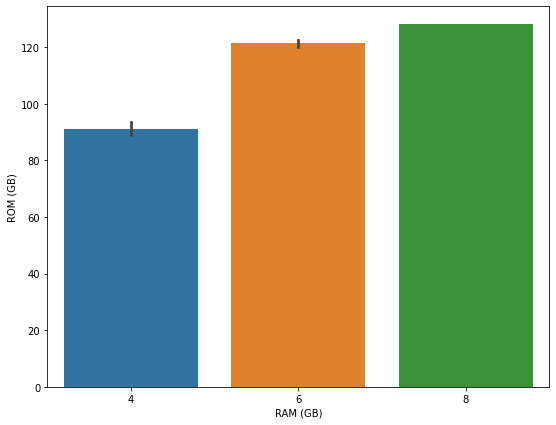

In [259]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='RAM (GB)',y='ROM (GB)')
plt.show()

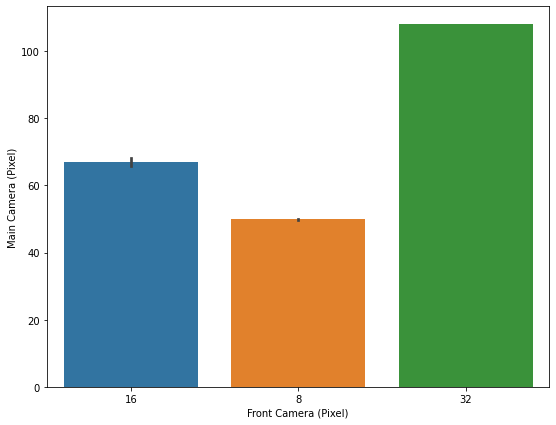

In [260]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='Front Camera (Pixel)',y='Main Camera (Pixel)')
plt.show()

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2087
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Battery (mAh)         2045 non-null   object 
 1   Processor             2045 non-null   object 
 2   RAM (GB)              2045 non-null   int32  
 3   ROM (GB)              2045 non-null   int32  
 4   Main Camera (Pixel)   2045 non-null   int32  
 5   Front Camera (Pixel)  2045 non-null   object 
 6   Company               2045 non-null   object 
 7   Color                 2045 non-null   object 
 8   Model                 2045 non-null   object 
 9   Price                 2045 non-null   float64
dtypes: float64(1), int32(3), object(6)
memory usage: 216.3+ KB


In [262]:
df['Battery (mAh)']=df['Battery (mAh)'].astype('int')
df['Front Camera (Pixel)']=df['Front Camera (Pixel)'].astype('int')

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2087
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Battery (mAh)         2045 non-null   int32  
 1   Processor             2045 non-null   object 
 2   RAM (GB)              2045 non-null   int32  
 3   ROM (GB)              2045 non-null   int32  
 4   Main Camera (Pixel)   2045 non-null   int32  
 5   Front Camera (Pixel)  2045 non-null   int32  
 6   Company               2045 non-null   object 
 7   Color                 2045 non-null   object 
 8   Model                 2045 non-null   object 
 9   Price                 2045 non-null   float64
dtypes: float64(1), int32(5), object(4)
memory usage: 200.3+ KB


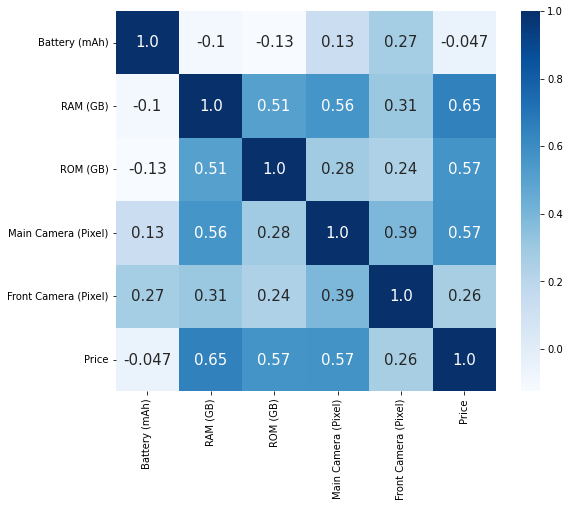

In [264]:
corr_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(9,7))
sns.heatmap(corr_matrix,annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='.2',cmap='Blues')
plt.show()

In [265]:
X=df.drop(columns=['Price'],axis='columns')
y=df['Price']

In [266]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [267]:
X_train.shape

(1636, 9)

In [268]:
X_test.shape

(409, 9)

In [269]:
X_train

,Battery (mAh),Processor,RAM (GB),ROM (GB),Main Camera (Pixel),Front Camera (Pixel),Company,Color,Model
969,5000,Snapdragon,6,128,50,16,Lenovo,Metallic White,MOTOROLA g52
1785,5000,Snapdragon,6,128,50,16,Lenovo,Metallic White,MOTOROLA g52
1453,5000,Snapdragon,8,128,108,16,Realme,Meteor Black,realme 9
1930,5000,Mediatek,6,128,50,16,Xiaomi,Cool Blue,POCO M4 Pro 5G
198,5000,Snapdragon,6,128,50,16,Lenovo,Charcoal Grey,MOTOROLA g52
...,...,...,...,...,...,...,...,...,...
1633,5000,Snapdragon,4,64,50,16,Realme,Prism Blue,realme 9i
1902,5000,Snapdragon,4,64,50,8,BBK Electronics,Space Blue,vivo T1X
1390,5000,Snapdragon,4,128,50,16,BBK Electronics,Rainbow Fantasy,vivo T1 5G
1580,5000,Snapdragon,4,128,50,8,BBK Electronics,Gravity Black,vivo T1X


In [270]:
y_train

969     12.999
1785    12.999
1453    14.999
1930    13.999
198     12.999
         ...  
1633    10.499
1902    11.999
1390    15.990
1580    12.999
881     12.999
Name: Price, Length: 1636, dtype: float64

In [273]:
transformer_list=[('encode',OneHotEncoder(sparse=False,drop='first'),[1,6,7,8]),
                 ('scale',StandardScaler(),[0,2,3,4,5])]

In [274]:
step1=ColumnTransformer(transformer_list,remainder='passthrough')
rf=RandomForestRegressor()
gbdt=GradientBoostingRegressor()
xgb=XGBRegressor()
lr=LinearRegression()
et=ExtraTreesRegressor()
step2=VotingRegressor([('rf',rf),('gbdt',gbdt),('xgb',xgb),('lr',lr),('et',et)],weights=[5,1,1,1,1])
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 Score is: ',r2_score(y_test,y_pred))
print('MAE is: ',mean_absolute_error(y_pred,y_test))
print('RMSE is: ',np.sqrt(mean_squared_error(y_pred,y_test)))

C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score is:  0.9999023943216394
MAE is:  0.01736522494299714
RMSE is:  0.02307109747978352


In [275]:
c=[5000,'Snapdragon',6,128,50,16,'Lenovo','Metallic White','MOTOROLA g52']

In [276]:
pipe.predict([c])

C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([13.00827435])

In [278]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))